In [25]:
from fastspt import simulate, fit2, tracklen, version, readers
import numpy as np
import logging
from glob import glob

logging.basicConfig(level=logging.INFO)
%matplotlib inline

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
version.__version__

'19.0-dev'

# Open dataset

In [40]:
w
paths = sorted(glob(path))
len(paths)

5

In [41]:
paths

['/Volumes/@MCM/Andrey/data/2019/0808-Daiki-Niceria-Men/S1-PILE-mCherry/tracking_561_prebleach_22ms(38Hz)_strobo_10_1/tracking_561_prebleach_22ms(38Hz)_strobo_10_1_MMStack_Pos0_Tracks.xml',
 '/Volumes/@MCM/Andrey/data/2019/0808-Daiki-Niceria-Men/S1-PILE-mCherry/tracking_561_prebleach_22ms(38Hz)_strobo_10_2/tracking_561_prebleach_22ms(38Hz)_strobo_10_2_MMStack_Pos0_Tracks.xml',
 '/Volumes/@MCM/Andrey/data/2019/0808-Daiki-Niceria-Men/S1-PILE-mCherry/tracking_561_prebleach_22ms(38Hz)_strobo_10_3/tracking_561_prebleach_22ms(38Hz)_strobo_10_3_MMStack_Pos0_Tracks.xml',
 '/Volumes/@MCM/Andrey/data/2019/0808-Daiki-Niceria-Men/S1-PILE-mCherry/tracking_561_prebleach_22ms(38Hz)_strobo_10_4/tracking_561_prebleach_22ms(38Hz)_strobo_10_4_MMStack_Pos0_Tracks.xml',
 '/Volumes/@MCM/Andrey/data/2019/0808-Daiki-Niceria-Men/S1-PILE-mCherry/tracking_561_prebleach_22ms(38Hz)_strobo_10_5/tracking_561_prebleach_22ms(38Hz)_strobo_10_5_MMStack_Pos0_Tracks.xml']

In [42]:
tracks = list(map(readers.read_trackmate_xml, paths))

INFO:fastspt.tracklen:1518 tracks, 8612 localizations
INFO:fastspt.tracklen:Fit result: 3172 * e^(-0.56x)


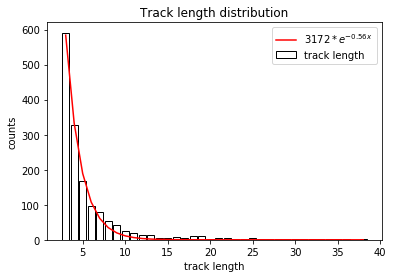

INFO:fastspt.tracklen:3178 tracks, 21355 localizations
INFO:fastspt.tracklen:Fit result: 4397 * e^(-0.48x)


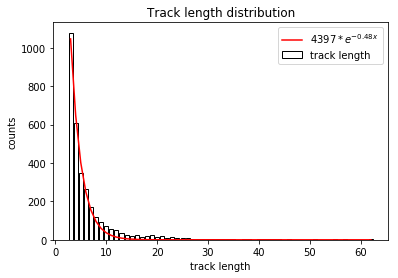

INFO:fastspt.tracklen:1658 tracks, 13409 localizations
INFO:fastspt.tracklen:Fit result: 2208 * e^(-0.39x)


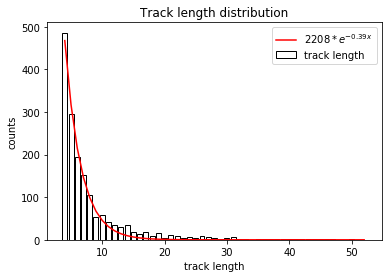

INFO:fastspt.tracklen:1090 tracks, 9321 localizations
INFO:fastspt.tracklen:Fit result: 1181 * e^(-0.36x)


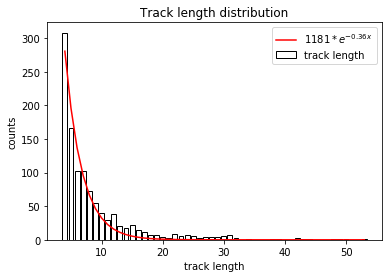

INFO:fastspt.tracklen:1839 tracks, 14970 localizations
INFO:fastspt.tracklen:Fit result: 2856 * e^(-0.42x)


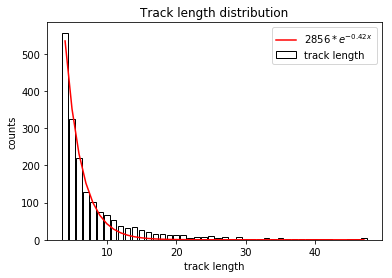

In [43]:
len_fit = list(map(tracklen.get_track_lengths_dist, tracks))

In [45]:
len_fit

[0.5640185818141228,
 0.4786602851948691,
 0.38810361388091824,
 0.3593022592887309,
 0.4187828695706257]

In [49]:
tracks[0][0]

      x [um]    y [um]  t [sec]  frame []  track.id []
0  56.458247  7.164622   13.026     501.0          0.0
1  56.488020  7.148617   13.052     502.0          0.0
2  56.537225  7.175072   13.078     503.0          0.0
3  56.450485  7.131675   13.104     504.0          0.0

# 2. Fit kinetics

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1518 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.29180221]), array([0.65560487, 0.34439513])),             1 lags


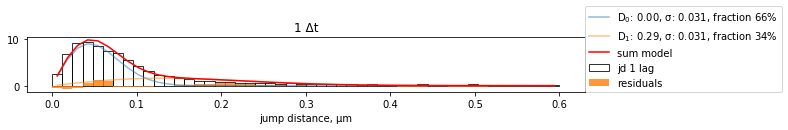

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 3178 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.21757358]), array([0.46283202, 0.53716798])),             1 lags


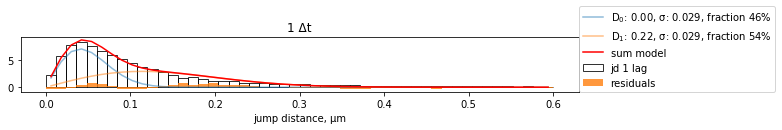

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1658 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.08622464]), array([0.51652678, 0.48347322])),             1 lags


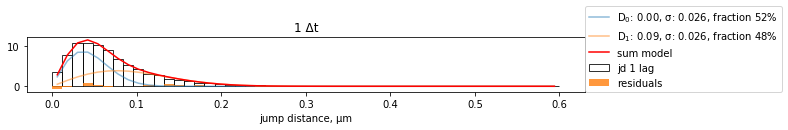

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1090 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.08399486]), array([0.52346324, 0.47653676])),             1 lags


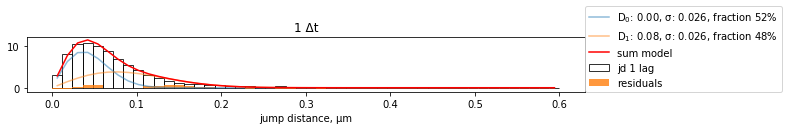

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1839 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.07660938]), array([0.48132341, 0.51867659])),             1 lags


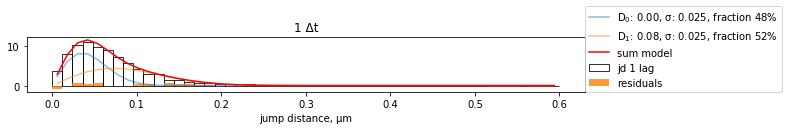

In [46]:
# fit one lag (1 Δt)
from functools import partial
fits = list(map(partial(fit2.fit_spoton_2_0, dt=0.026), tracks))

In [50]:
fits_table = fit2.result_2_table(*fits)
fits_table

,sigma_0,D_0,D_1,F_0,F_1,dt,n_tracks,chi2,chi2_norm,n_iter
replicate,,,,,,,,,,
0,0.031123,0.0,0.291802,0.655605,0.344395,0.026,1518,5.776140,0.115523,121
1,0.028614,0.0,0.217574,0.462832,0.537168,0.026,3178,4.993814,0.099876,96
2,0.025580,0.0,0.086225,0.516527,0.483473,0.026,1658,1.985447,0.039709,51
3,0.025609,0.0,0.083995,0.523463,0.476537,0.026,1090,2.711453,0.054229,91
4,0.025102,0.0,0.076609,0.481323,0.518677,0.026,1839,3.548394,0.070968,76


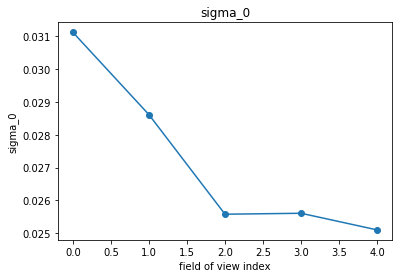

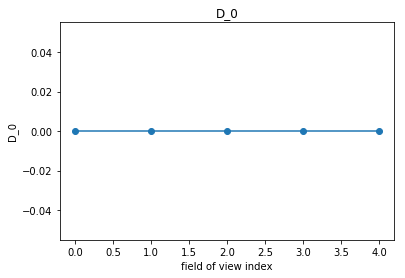

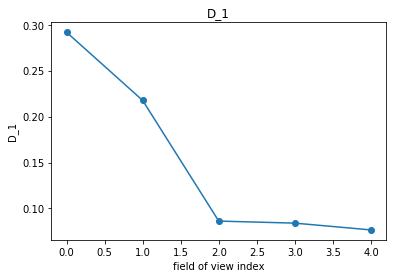

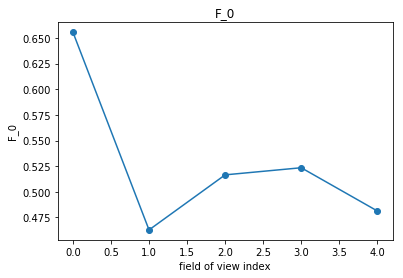

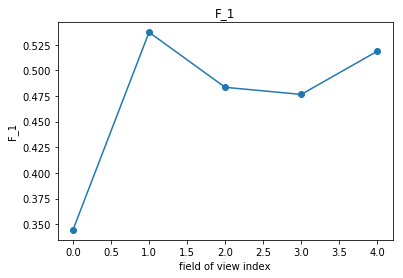

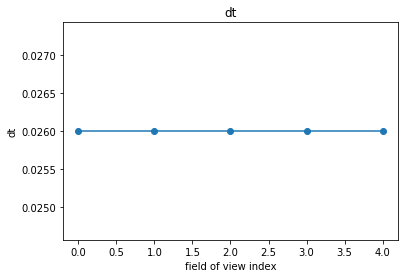

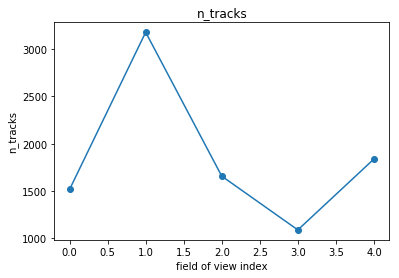

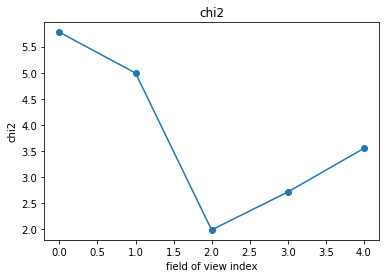

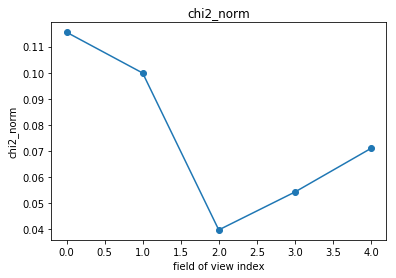

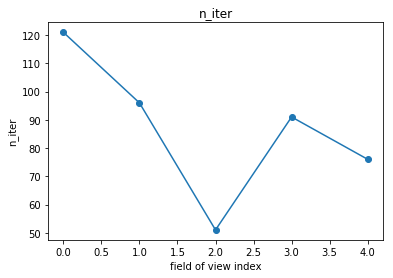

In [58]:
def plot_table_values(fits_table):
    for c in fits_table.columns:
        fit2.plt.plot(fits_table[c], 'o-')
        fit2.plt.xlabel('field of view index')
        fit2.plt.ylabel(c)
        fit2.plt.title(c)
        fit2.plt.show()

plot_table_values(fits_table)
    

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1518 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([5.52163493e-09, 1.82252661e-01]), array([0.74864869, 0.25135131])),             7 lags


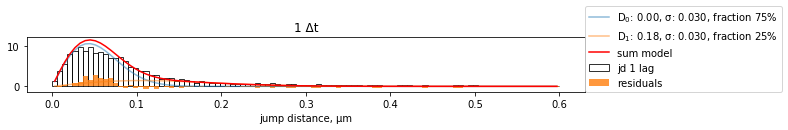

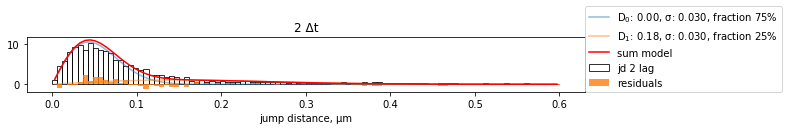

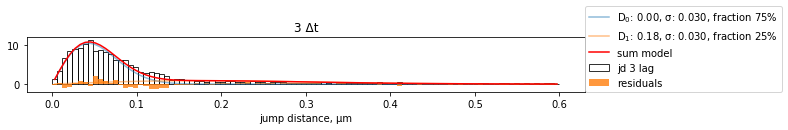

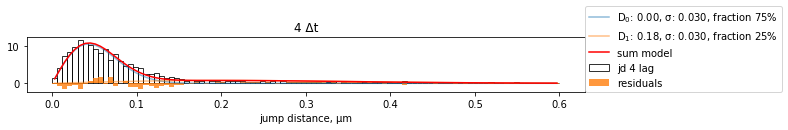

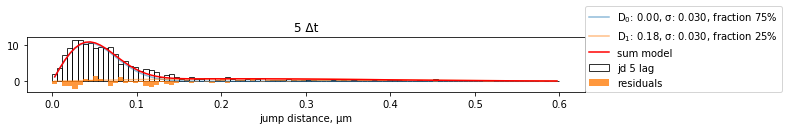

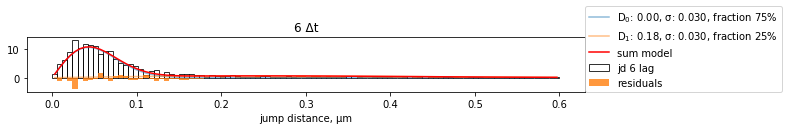

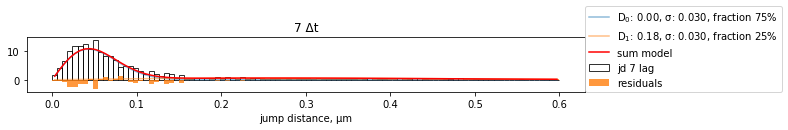

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 3178 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([1.57977964e-09, 1.38018816e-01]), array([0.59360611, 0.40639389])),             7 lags


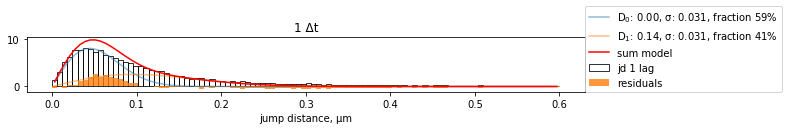

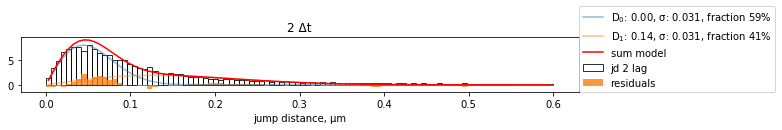

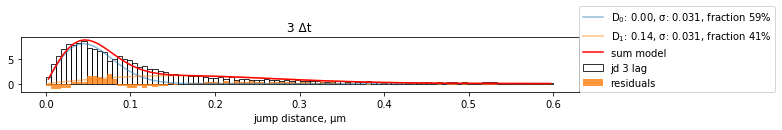

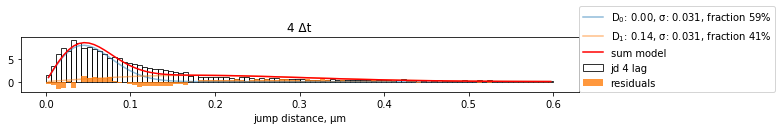

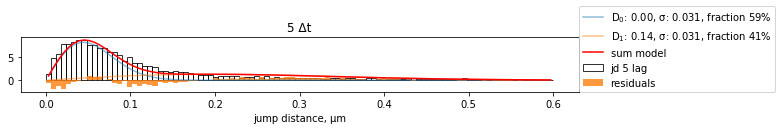

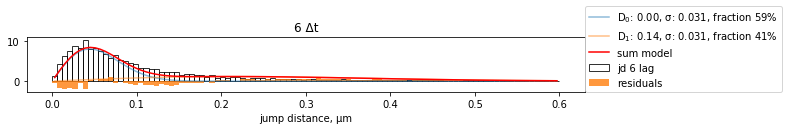

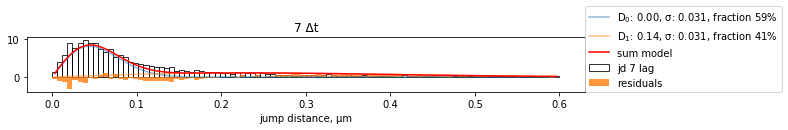

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1658 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([4.13756496e-09, 6.16922900e-02]), array([0.72904799, 0.27095201])),             7 lags


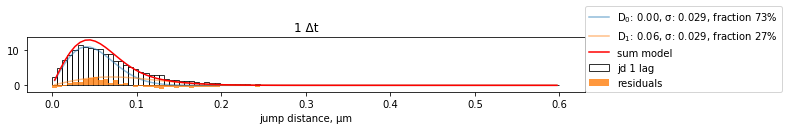

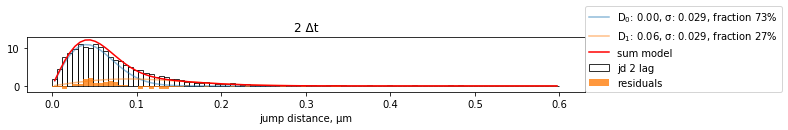

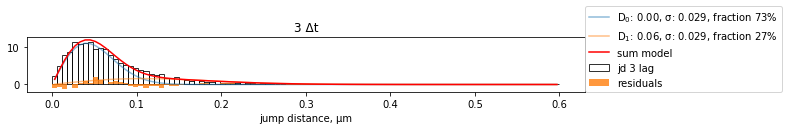

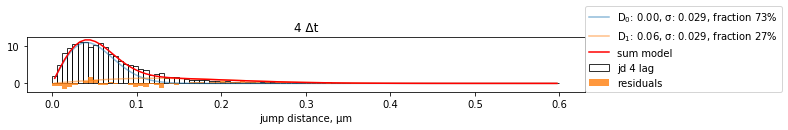

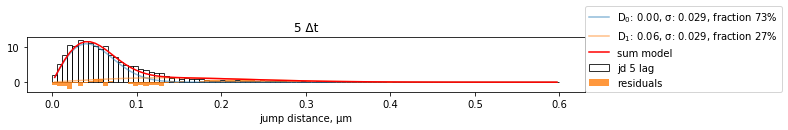

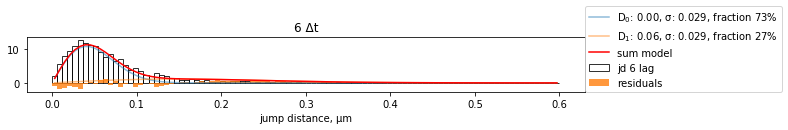

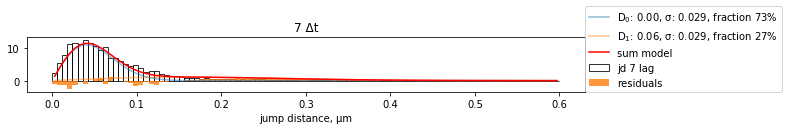

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1090 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([5.03874233e-05, 8.19058610e-02]), array([0.68191246, 0.31808754])),             7 lags


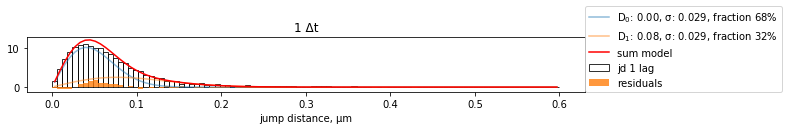

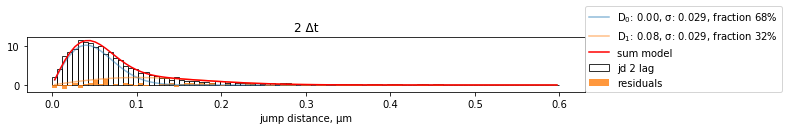

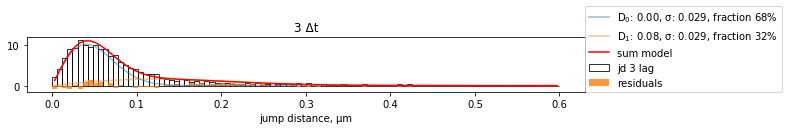

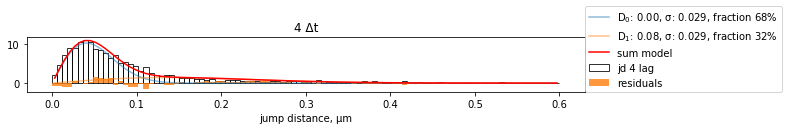

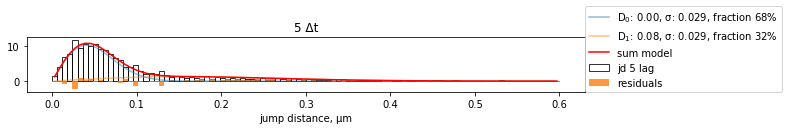

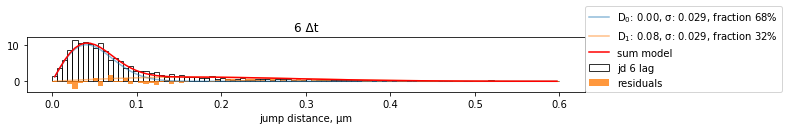

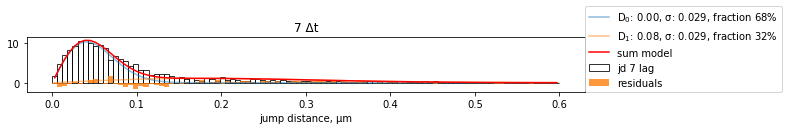

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1839 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([4.37758052e-10, 9.45060984e-02]), array([0.73584864, 0.26415136])),             7 lags


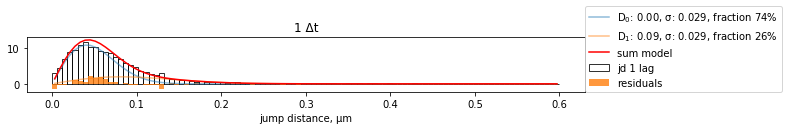

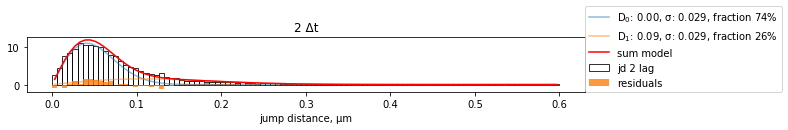

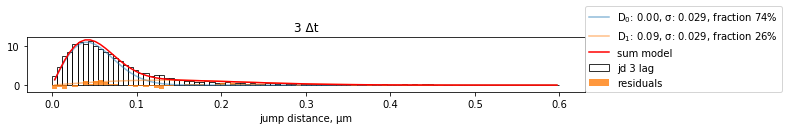

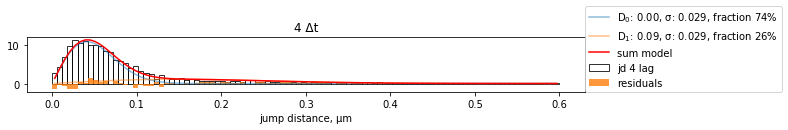

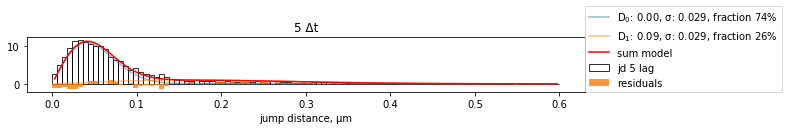

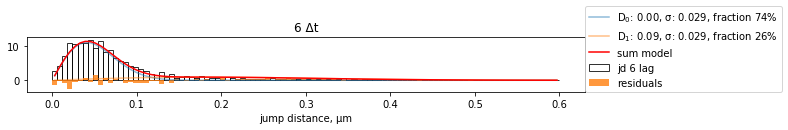

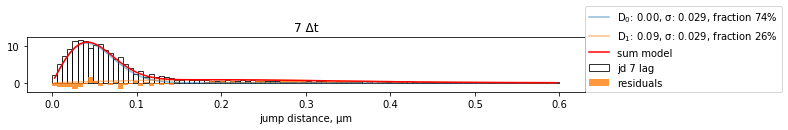

In [57]:
# fit 5 lags (1..5 Δt)

fitter = partial(fit2.fit_spoton_2_0, dt=0.026, n_lags=7, 
                 return_fit_result=1, D=(0.05, 0.5), n_bins=100, max_um=0.6)
fits7lags = list(map(fitter, tracks))

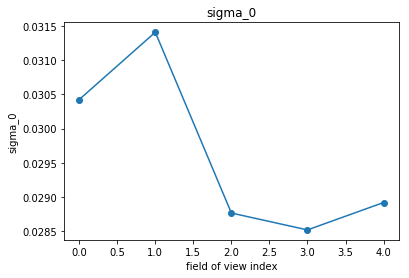

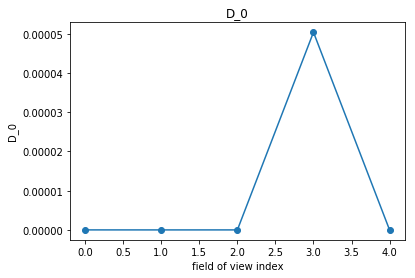

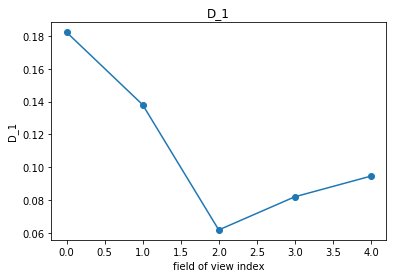

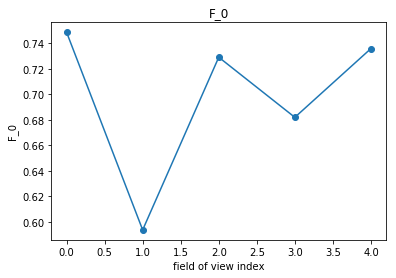

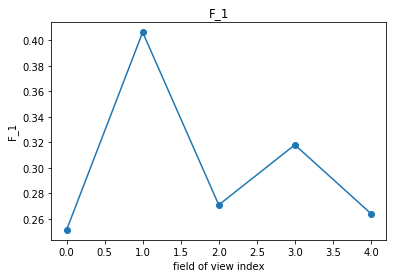

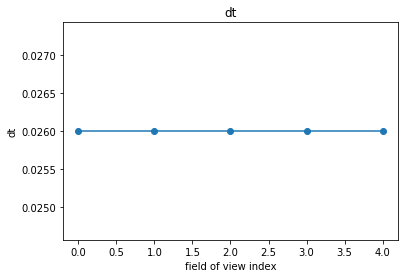

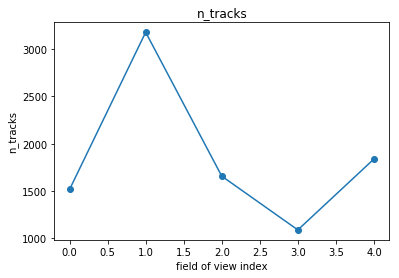

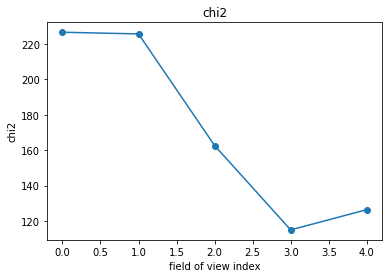

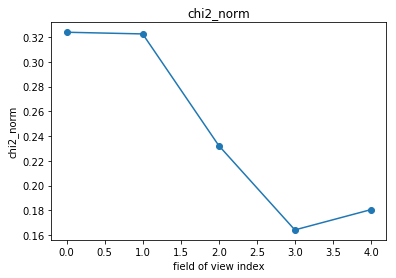

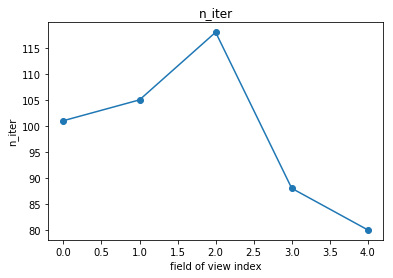

In [61]:
plot_table_values(fit2.result_2_table(*fits7lags))